In [90]:
import numpy as np
import matplotlib.pyplot as plt
MaxBead = 100 #bead length
MaxTime = 5000 #number of frames
dumpTime = 100
replicas = 10

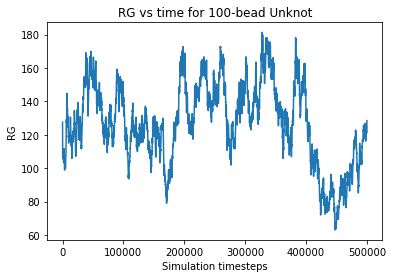

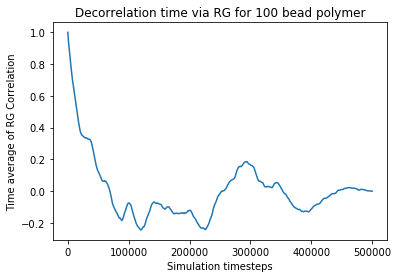

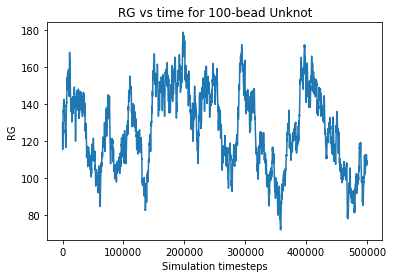

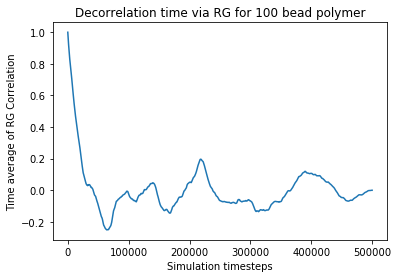

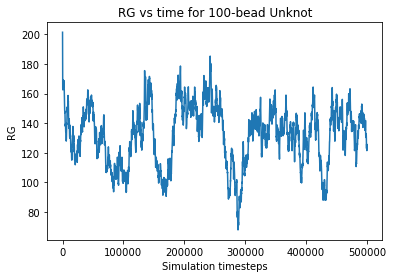

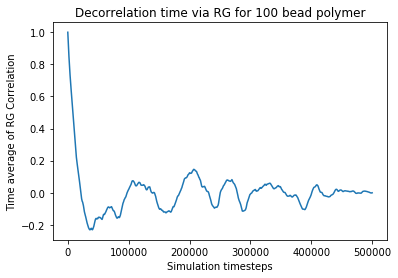

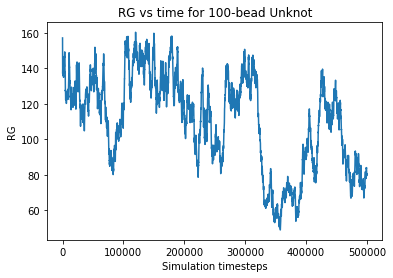

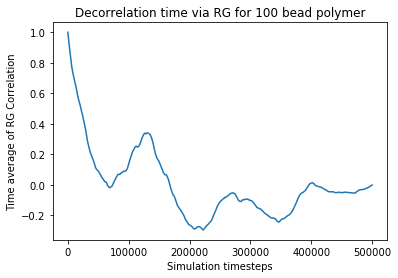

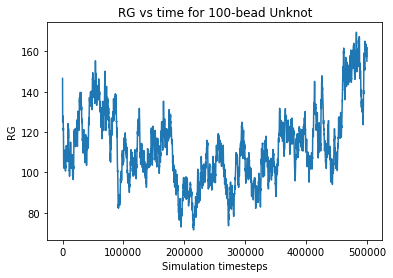

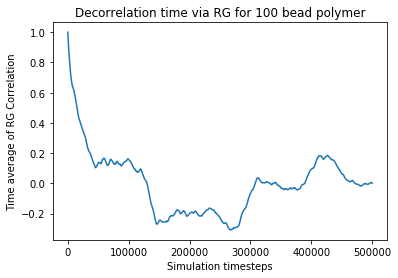

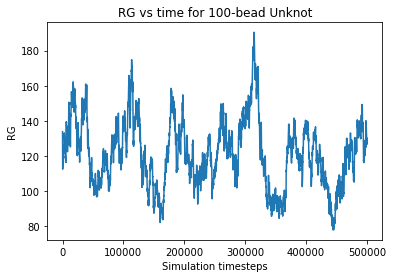

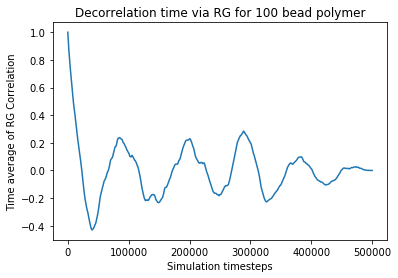

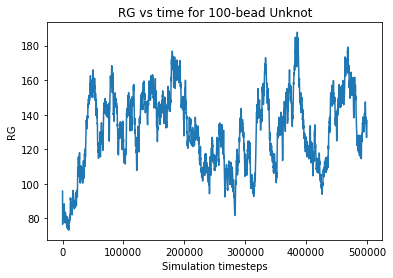

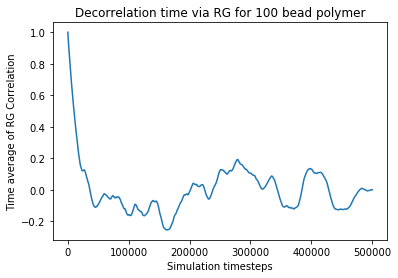

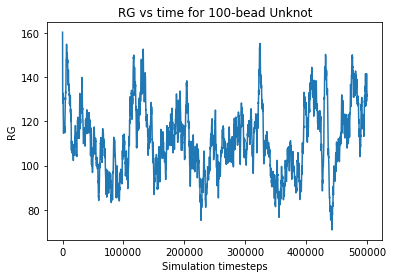

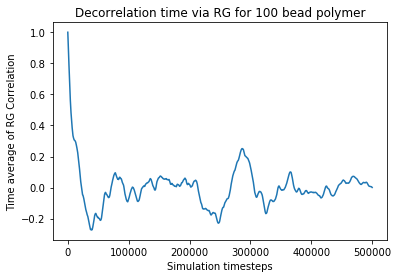

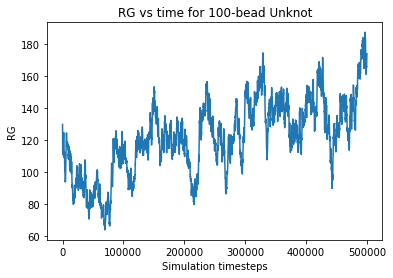

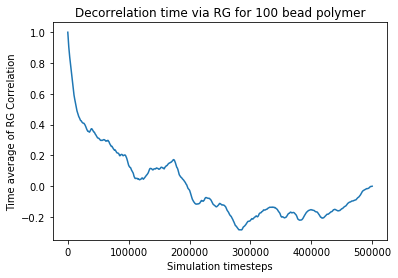

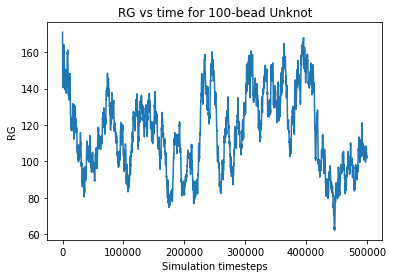

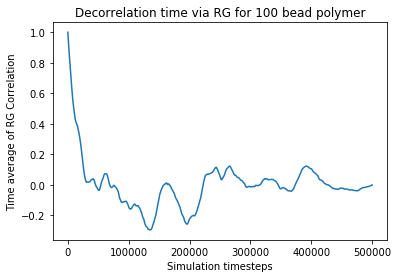

In [95]:
autocorr_total = np.zeros((replicas, MaxTime))

time = []
for val in range(MaxTime):
    time.append(val*100)
    
# file = "RG_KNOT0_1.2.dat"
# file = "D:\PoL\Beads100\REOR\RG_KNOT0_1.dat"
for i in range(replicas):
    frames = []
    RG = []
    
    file = "AutocorrelationData\RG_KNOT0_1" + str(i) +".dat"
    f = open(file,"r")
    lines=f.readlines()
    for x in lines:
        frames.append(int(x.split(' ')[0]))
        RG.append(float(x.split(' ')[1]))  
    f.close()
    plt.plot(time, RG)
    plt.title("RG vs time for 100-bead Unknot")
    plt.xlabel("Simulation timesteps")
    plt.ylabel("RG")
    plt.show()
    
    mean = np.mean(RG)
    fluctuation = []
    for element in RG:
        fluctuation.append(element-mean)

    autocorrelation_list = []
    normaliser = 0
    for tau in range(MaxTime):
        sum_val = 0
        for t in range(MaxTime-tau):
            sum_val += fluctuation[t]*fluctuation[t+tau]
            if tau == 0:
                normaliser += fluctuation[t]*fluctuation[t+tau]

        autocorrelation_list.append(sum_val/normaliser)
        
    plt.plot(time, autocorrelation_list)
    plt.ylabel("Time average of RG Correlation")
    plt.xlabel("Simulation timesteps")
    plt.title("Decorrelation time via RG for 100 bead polymer")
    plt.show()
    autocorr_total[i] = autocorrelation_list


In [96]:
autocorr_mean = np.mean(autocorr_total, axis=0)
print(autocorr_mean)

[1.00000000e+00 9.95700203e-01 9.88556815e-01 ... 8.40809916e-05
 8.01929637e-05 6.63315128e-05]


In [80]:
autocorr_total = []
for t in range(0, MaxTime):
    Ctotal = 0
    for i in range(0, MaxBead):
        Ctotal += Calpha[i][t]
    Ctotal/=MaxBead
    Ctotallist.append(Ctotal)

plt.plot(time, Ctotallist, label='Average $C_α(τ)$')
# plt.title("Average over all beads at each time, Tau for a 100-bead unknotted polymer chain ")
plt.xlabel("LAMMPS Timesteps, τ")
plt.ylabel(r'Reorientation of Unknot ($0_1$)')
plt.savefig("REORTEST.png", bbox_inches='tight')
plt.show()

In [88]:
# print(RG)

In [72]:
# decorrelation_list = []
# mean = np.mean(RG)
# for tau in range(MaxTime):
#     counter = 0
#     decorrelation = 0
#     for t in range(MaxTime):
#         if tau+t<MaxTime:
#             decorrelation += RG[tau]*RG[tau+t]
#             counter +=1
#     decorrelation/=counter
#     decorrelation -= mean*mean
#     decorrelation_list.append(decorrelation)

In [84]:
# mean = np.mean(RG)
# fluctuation = []
# for element in RG:
#     fluctuation.append(element-mean)
    
# autocorrelation_list = []
# normaliser = 0
# for tau in range(MaxTime):
#     sum_val = 0
#     for t in range(MaxTime-tau):
#         sum_val += fluctuation[t]*fluctuation[t+tau]
#         if tau == 0:
#             normaliser += fluctuation[t]*fluctuation[t+tau]
        
#     autocorrelation_list.append(sum_val/normaliser)

In [89]:
# print(decorrelation_list)

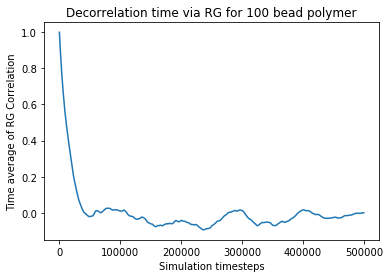

In [97]:
plt.plot(time, autocorr_mean)
plt.ylabel("Time average of RG Correlation")
plt.xlabel("Simulation timesteps")
plt.title("Decorrelation time via RG for 100 bead polymer")
plt.show()

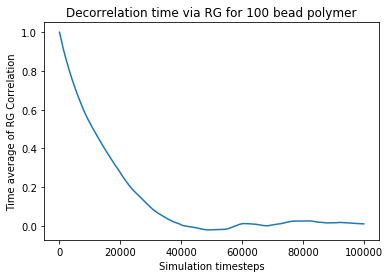

In [101]:
plt.plot(time[0:1000], autocorr_mean[0:1000])
plt.ylabel("Time average of RG Correlation")
plt.xlabel("Simulation timesteps")
plt.title("Decorrelation time via RG for 100 bead polymer")
plt.show()

In [98]:
np.savetxt("autocor.dat", np.c_[time,autocorr_mean],"%.6f" )